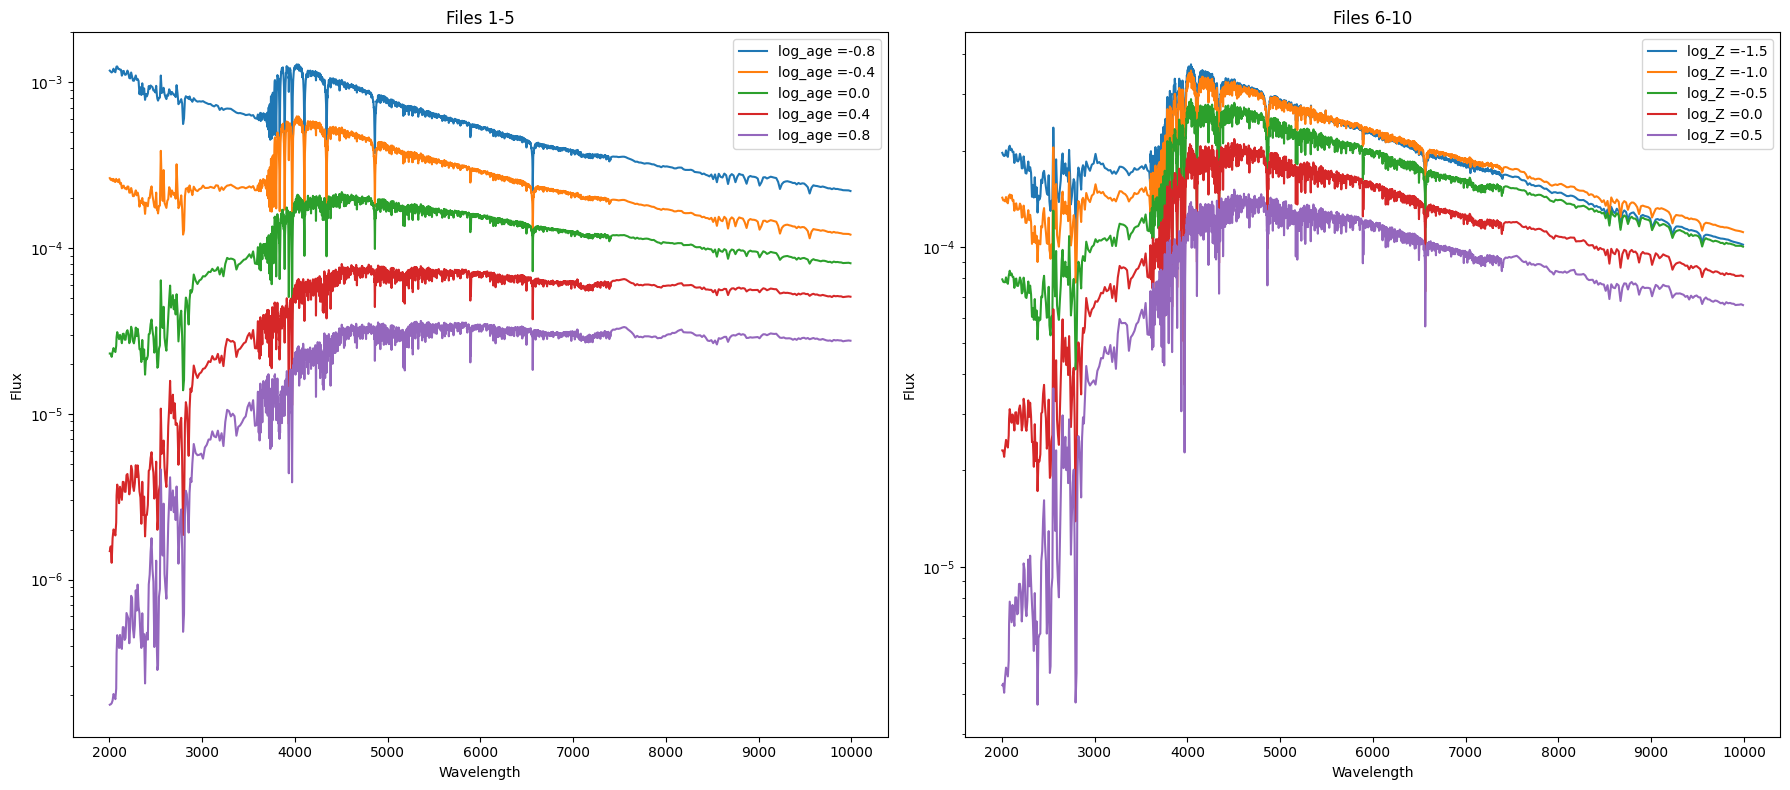

In [306]:
import numpy as np
from astropy.io import ascii, fits
from matplotlib import pyplot as plt
from astropy import units as u
from astropy import constants as const
from astropy.table import Table
from scipy import stats
#1a
filename1 = 'hw5_files/spec_logage-0p8_Z0.csv'
filename2 = 'hw5_files/spec_logage-0p4_Z0.csv'
filename3 = 'hw5_files/spec_logage0_Z0.csv'
filename4 = 'hw5_files/spec_logage0p4_Z0.csv'
filename5 = 'hw5_files/spec_logage0p8_Z0.csv'
filename6 = 'hw5_files/spec_logage0_Z-1p5.csv'
filename7 = 'hw5_files/spec_logage0_Z-1.csv'
filename8 = 'hw5_files/spec_logage0_Z-0p5.csv'
filename9 = 'hw5_files/spec_logage0_Z0.csv'
filename10 = 'hw5_files/spec_logage0_Z0p5.csv'
files = [filename1, filename2, filename3, filename4, filename5, filename6, filename7, filename8, filename9, filename10]
waves = []
fluxes = []
for filename in files:
    data = ascii.read(filename)
    waves.append(data['wave'])
    fluxes.append(data['flux'])
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
for i in range(5):
    ax[0].plot(waves[i], fluxes[i], label=f'log_age ={0.4*(float(i) - 2.0)}')

for i in range(5, 10):
    ax[1].plot(waves[i], fluxes[i], label=f'log_Z ={0.5 *i - 4}')
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].legend()
ax[1].legend()

# Add titles and labels
ax[0].set_title('Files 1-5')
ax[1].set_title('Files 6-10')
ax[0].set_xlabel('Wavelength')
ax[0].set_ylabel('Flux')
ax[1].set_xlabel('Wavelength')
ax[1].set_ylabel('Flux')

plt.tight_layout()  
plt.show()

As the age of the population increases, there are less bright blue stars and thus the flux decreases. And the peak wavelength of the flux 
also shifts to the right since smaller stars have longer peak wavelengths. Metal-rich stars have more elements heavier than helium, which can affect opacities and line blanketing, altering the SED shape, dimming the flux. Higher metallicity can lead to more absorption in certain wavelengths, affecting the overall spectrum.

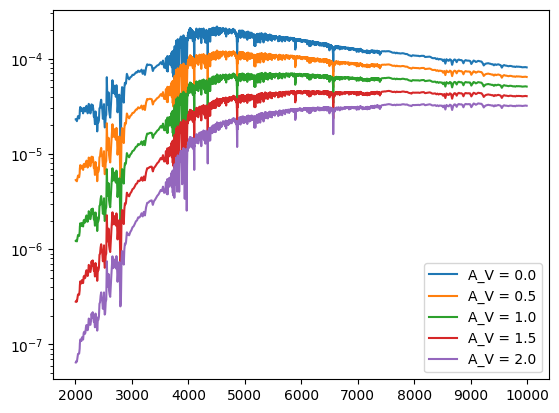

In [44]:
# 1b
data = ascii.read(filename3)
wavelength = data['wave']
flux = data['flux']
Av= [0.0, 0.5, 1.0, 1.5, 2.0]
def calculate_A_lambda(wavelength, A_V, flux):
    # Calculate the attenuation at each wavelength
    A_lambda = A_V * (wavelength / 5500.0) ** -1.15
    final_flux = flux * 10 ** (-0.4 * A_lambda)
    return final_flux
for i in Av:
    final_flux = calculate_A_lambda(wavelength, i, flux)
    plt.plot(wavelength, final_flux, label=f'A_V = {i}')
    plt.yscale('log')
    plt.legend()

It is clear that as the dust attenuation increases, the flux decreases. It has a similar effect on the flux than the age. Since the dust tends to redden the light emmitted from the stars, which has a similar look with the log_age.

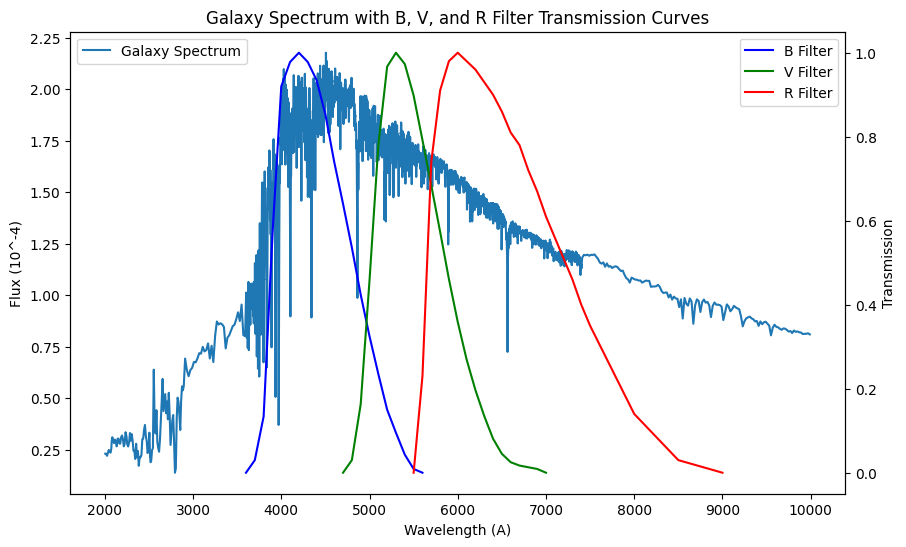

In [63]:
#1c
filt1 = ascii.read('hw5_files/bessell_B.dat', names=['wave', 'transm'])
filt2 = ascii.read('hw5_files/bessell_V.dat', names=['wave', 'transm'])
filt3 = ascii.read('hw5_files/bessell_R.dat', names=['wave', 'transm'])
spectrum = ascii.read('hw5_files/spec_logage0_Z0.csv')
wave = spectrum['wave']
flux = spectrum['flux'] * 1e4 

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(wave, flux, label='Galaxy Spectrum')
ax1.set_xlabel('Wavelength (A)')
ax1.set_ylabel('Flux (10^-4)')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(filt1['wave'], filt1['transm'], color='blue', label='B Filter')
ax2.plot(filt2['wave'], filt2['transm'], color='green', label='V Filter')
ax2.plot(filt3['wave'], filt3['transm'], color='red', label='R Filter')
ax2.set_ylabel('Transmission')
ax2.legend(loc='upper right')
plt.title('Galaxy Spectrum with B, V, and R Filter Transmission Curves')
plt.show()

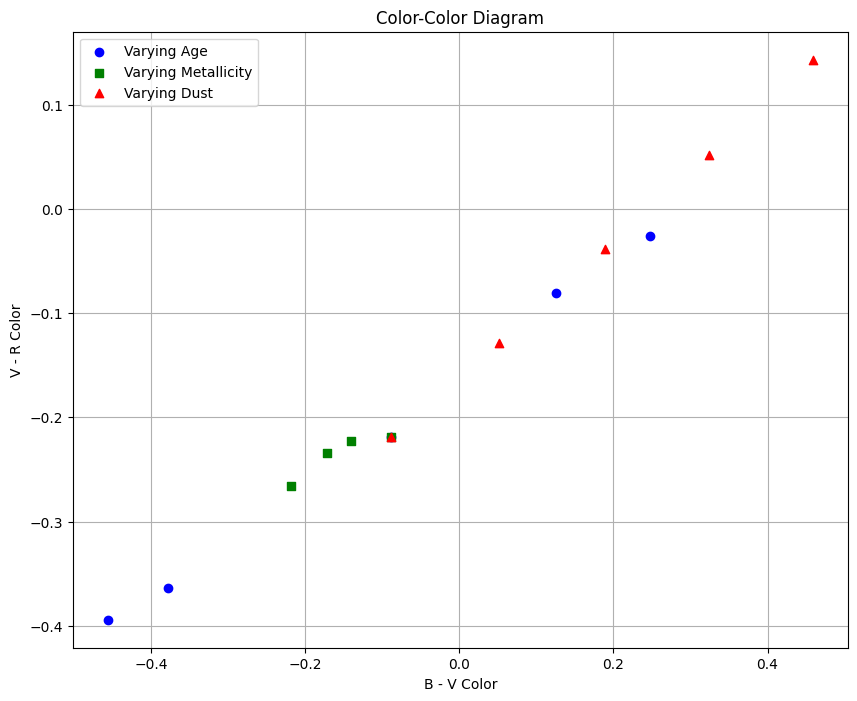

In [72]:
#1d

# Function to compute magnitude
def compute_magnitude(wave, flux, filter_wave, filter_transm):
    filter_interp = np.interp(wave, filter_wave, filter_transm, left=0, right=0)
    flux_filtered = flux * filter_interp
    numerator = np.trapz(flux_filtered * wave, wave)
    denominator = np.trapz(filter_interp * wave, wave)
    flux_avg = numerator / denominator
    mag = -2.5 * np.log10(flux_avg)
    return mag

bv_colors_age = []
vr_colors_age = []
for i in range(5):
    wave = waves[i]
    flux = fluxes[i]
    mag_B = compute_magnitude(wave, flux, filt1['wave'], filt1['transm'])
    mag_V = compute_magnitude(wave, flux, filt2['wave'], filt2['transm'])
    mag_R = compute_magnitude(wave, flux, filt3['wave'], filt3['transm'])
    bv_colors_age.append(mag_B - mag_V)
    vr_colors_age.append(mag_V - mag_R)
bv_colors_metallicity = []
vr_colors_metallicity = []
for i in range(5, 9):  
    wave = waves[i]
    flux = fluxes[i]
    mag_B = compute_magnitude(wave, flux, filt1['wave'], filt1['transm'])
    mag_V = compute_magnitude(wave, flux, filt2['wave'], filt2['transm'])
    mag_R = compute_magnitude(wave, flux, filt3['wave'], filt3['transm'])
    bv_colors_metallicity.append(mag_B - mag_V)
    vr_colors_metallicity.append(mag_V - mag_R)

spectrum_dust_wave = waves[2]
spectrum_dust_flux = fluxes[2]
bv_colors_dust = []
vr_colors_dust = []

for AV in Av:
    flux_attenuated = calculate_A_lambda(spectrum_dust_wave, AV, spectrum_dust_flux)
    mag_B = compute_magnitude(spectrum_dust_wave, flux_attenuated, filt1['wave'], filt1['transm'])
    mag_V = compute_magnitude(spectrum_dust_wave, flux_attenuated, filt2['wave'], filt2['transm'])
    mag_R = compute_magnitude(spectrum_dust_wave, flux_attenuated, filt3['wave'], filt3['transm'])
    bv_colors_dust.append(mag_B - mag_V)
    vr_colors_dust.append(mag_V - mag_R)

plt.figure(figsize=(10, 8))
plt.scatter(bv_colors_age, vr_colors_age, color='blue', label='Varying Age', marker='o')
plt.scatter(bv_colors_metallicity, vr_colors_metallicity, color='green', label='Varying Metallicity', marker='s')
plt.scatter(bv_colors_dust, vr_colors_dust, color='red', label='Varying Dust', marker='^')

plt.xlabel('B - V Color')
plt.ylabel('V - R Color')
plt.title('Color-Color Diagram')
plt.legend()
plt.grid(True)
plt.show()


Age: -0.8 Gyr, Chi-square: 1013.9905922611226
Age: -0.4 Gyr, Chi-square: 808.8256525705439
Age: 0 Gyr, Chi-square: 257.41781695427517
Age: 0.4 Gyr, Chi-square: 55.08585282318522
Age: 0.8 Gyr, Chi-square: 88.77539276407234


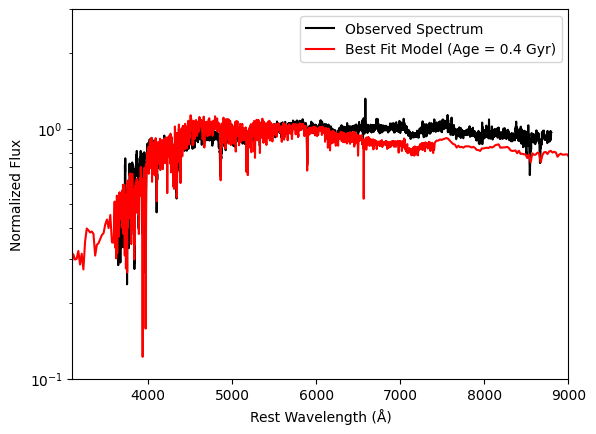

Best-fit age: 0.4 Gyr, Chi-square: 55.08585282318522


In [230]:
#1e
from scipy.interpolate import interp1d
with fits.open('hw5_files/spec-0570-52266-0537.fits') as hdu:
    galaxy = hdu[1].data
    header = hdu[0].header
zz = 0.047 
wv = 10**(galaxy['loglam']) / (zz + 1)  
flux = galaxy['flux']
ages = [-0.8, -0.4, 0, 0.4, 0.8]  
# Function to normalize the spectrum within the 5500-5700 Å range
def normalize_spectrum(wv, flux, lower_bound=5500, upper_bound=5700):
    mask = (wv >= lower_bound) & (wv <= upper_bound)
    median_flux = np.median(flux[mask])
    normalized_flux = flux / median_flux
    return normalized_flux
# Function to calculate chi-square between model and observed data
def calculate_chi_square(model_wl, model_flux, data_wl, data_flux):
    interp_model = interp1d(model_wl, model_flux, kind='linear', fill_value='extrapolate')
    model_flux_interp = interp_model(data_wl)
    return np.sum((data_flux - model_flux_interp)**2 / model_flux_interp)
normalized_flux = normalize_spectrum(wv, flux)
best_fit_wave_model = None
best_fit_flux_model = None
best_chi_square = np.inf  
best_age = None
for i in range(5):  
    wave_model = waves[i] 
    flux_model = fluxes[i]  
    age = ages[i]  
    normalized_flux_model = normalize_spectrum(wave_model, flux_model)
    chi_square = calculate_chi_square(wave_model, normalized_flux_model, wv, normalized_flux)
    if chi_square < best_chi_square:
        best_chi_square = chi_square
        best_fit_wave_model = wave_model
        best_fit_flux_model = normalized_flux_model
        best_age = age
plt.figure()
plt.plot(wv, normalized_flux, label="Observed Spectrum", color='black')
plt.plot(best_fit_wave_model, best_fit_flux_model, label=f'Best Fit Model (Age = {best_age} Gyr)', color='red', )
plt.yscale('log')
plt.ylim(0.1, 3)
plt.xlim(3100, 9000)
plt.xlabel('Rest Wavelength (Å)')
plt.ylabel('Normalized Flux')
plt.legend()
plt.show()
print(f"Best-fit age: {best_age} Gyr, Chi-square: {best_chi_square}")


Chi-square for Av = 0.0: 55.08585282318522
Chi-square for Av = 0.1: 47.81639055092903
Chi-square for Av = 0.2: 45.02002703826719
Chi-square for Av = 0.203: 45.01707330976184


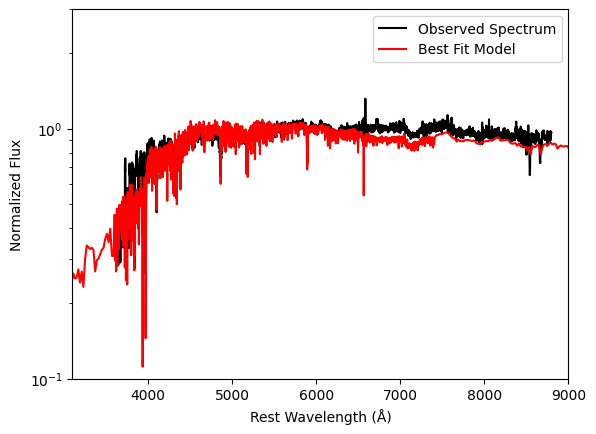

In [294]:
#1f
best_fit_wave_model = None
best_fit_flux_model = None
best_chi_square = np.inf  
data = ascii.read(filename4)
Av = [0.0, 0.1, 0.2, 0.203]  # Ensure Av is defined as a list
wavelength = data['wave']
flux = data['flux']
for i in Av:  
    count = 0
    final_flux = calculate_A_lambda(wavelength, i, flux)
    normalized_flux_model = normalize_spectrum(wavelength, final_flux)

    chi_square = calculate_chi_square(wave_model, normalized_flux_model, wv, normalized_flux)
    
    if chi_square < best_chi_square:
        best_chi_square = chi_square
        best_fit_wave_model = wave_model
        best_fit_flux_model = normalized_flux_model
        print(f"Chi-square for Av = {i}: {chi_square}")
       
plt.figure()
plt.plot(wv, normalized_flux, label="Observed Spectrum", color='black')
plt.plot(best_fit_wave_model, best_fit_flux_model, label=f'Best Fit Model', color='red', )
plt.yscale('log')
plt.ylim(0.1, 3)
plt.xlim(3100, 9000)
plt.xlabel('Rest Wavelength (Å)')
plt.ylabel('Normalized Flux')
plt.legend()
plt.show()


In [ ]:
#1g
c = 3.0e10  
pc_to_cm = 3.086e18  
Mpc_to_cm = pc_to_cm * 1e6  
flux_obs = flux * 1e-17
best_model_index = 3  
wave_model = waves[best_model_index]  
flux_model = fluxes[best_model_index]  
interp_model_flux = interp1d(wave_model, flux_model, kind='linear', bounds_error=False, fill_value=0)
model_flux_at_obs_wv = interp_model_flux(wv) 
D_L = 200 * Mpc_to_cm 
flux_model_at_earth = model_flux_at_obs_wv / (4 * np.pi * D_L**2)
mask = (flux_model_at_earth > 0) & (flux_obs > 0)
flux_model_at_earth = flux_model_at_earth[mask]
flux_obs = flux_obs[mask]
M_star_numerator = np.sum(flux_obs * flux_model_at_earth)
M_star_denominator = np.sum(flux_model_at_earth**2)
M_star = M_star_numerator / M_star_denominator

print(f"The stellar mass of the galaxy is: {M_star:.2e} solar masses")
